In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best


In [4]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [5]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [6]:
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [7]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [8]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

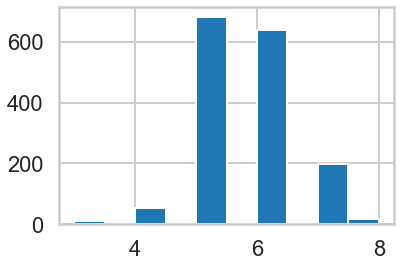

In [9]:
print(df.shape)

plt.hist(df.quality)

In [10]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [11]:
Xnames = list(df.columns.values[1:11])

In [12]:
np.mean(df['target'])

0.1357098186366479

In [13]:
# Create test/train mask
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [14]:
# make sure we didn't get unlucky in our mask selection
print("% Good wines in Training:", np.mean(df.target[mask]))
print("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.145985401459854
% Good wines in Testing: 0.1203125


In [15]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 1} 0.38579017922083614 {'mean_fit_time': array([0.00099688, 0.00079522, 0.00059819, 0.00059834, 0.00079799,
       0.00039859, 0.00099759, 0.00039883, 0.00079718, 0.00079808,
       0.0007987 , 0.00099926, 0.00059838, 0.00079803, 0.00099707,
       0.00099678, 0.00079713, 0.00099778, 0.00079803, 0.0009973 ,
       0.00079699, 0.00099778, 0.00099773, 0.00080037, 0.00239348,
       0.00079741, 0.00099778, 0.00119476, 0.00079775, 0.00099773,
       0.00099611, 0.00079789, 0.00099754, 0.00119653, 0.00099611,
       0.00079813, 0.00059853, 0.00039878, 0.00099735, 0.00119534,
       0.00099702, 0.00059843]), 'std_fit_time': array([1.82448640e-06, 3.97627973e-04, 7.97450608e-04, 4.88538846e-04,
       3.98993531e-04, 4.88169115e-04, 6.81059687e-07, 4.88460855e-04,
       3.98596438e-04, 3.99041785e-04, 3.99352757e-04, 2.49327020e-06,
       4.88577935e-04, 3.99018531e-04, 6.30449686e-04, 4.86280395e-07,
       3.98574618e-04, 7.53945746e-07

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


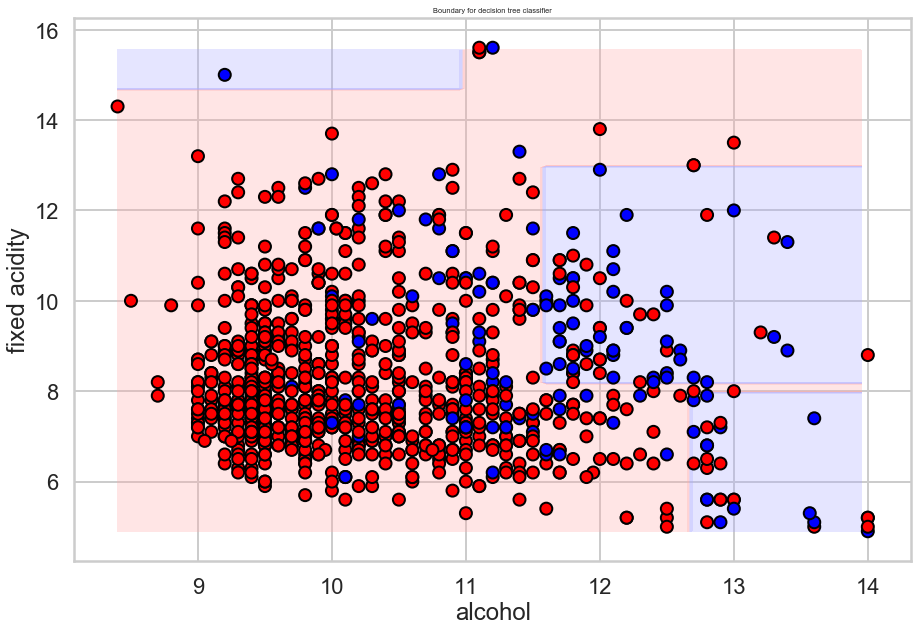

In [16]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

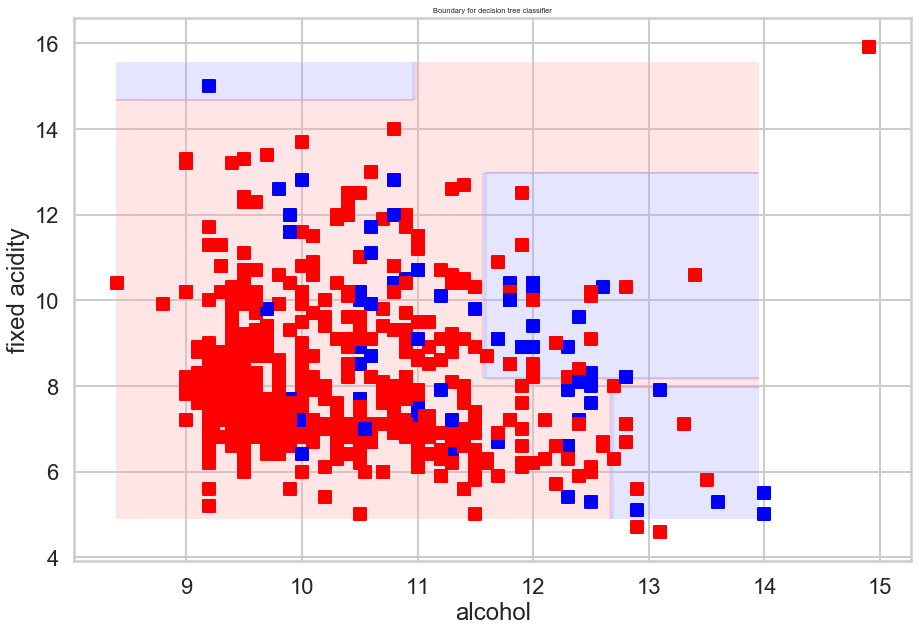

In [17]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.32218449157455453 {'mean_fit_time': array([0.00159593, 0.00099773, 0.00059829]), 'std_fit_time': array([0.00048819, 0.00063083, 0.0004885 ]), 'mean_score_time': array([0.00119791, 0.00119615, 0.00079784]), 'std_score_time': array([0.00039859, 0.00039864, 0.00039892]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.35      , 0.22857143, 0.27777778]), 'split1_test_score': array([0.29508197, 0.34285714, 0.36619718]), 'split2_test_score': array([0.34146341, 0.3902439 , 0.35897436]), 'split3_test_score': array([0.4411

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


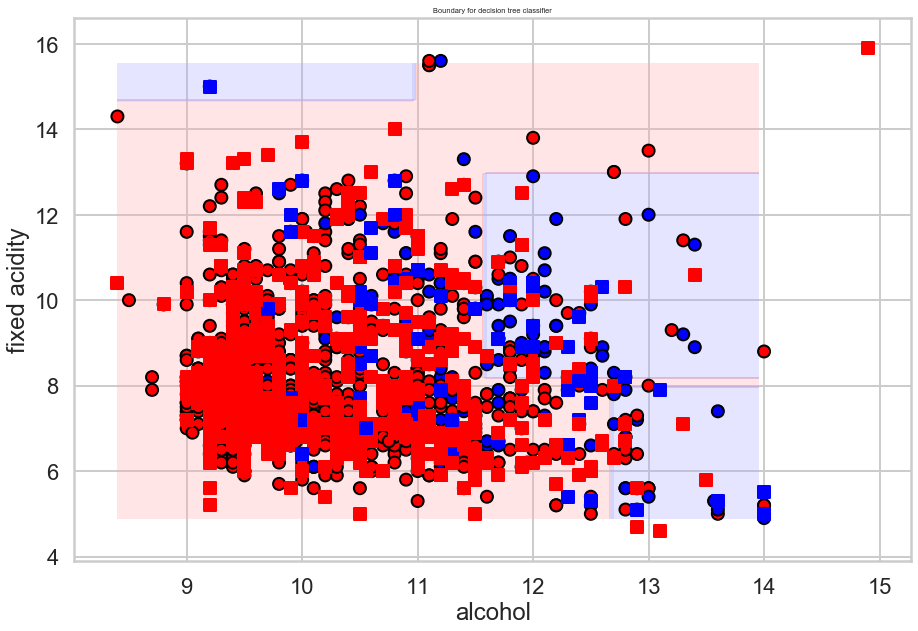

In [18]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [19]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 6, 'min_samples_leaf': 2} 0.43784960274941886 {'mean_fit_time': array([0.0011972 , 0.0009944 , 0.00079832, 0.00199456, 0.0015964 ,
       0.00418682, 0.00119743, 0.001197  , 0.00119743, 0.0009974 ,
       0.00159593, 0.00199385, 0.00199471, 0.00199165, 0.00319171,
       0.001794  , 0.00139532, 0.0015934 , 0.00179358, 0.00139685,
       0.0017952 , 0.00259304, 0.00219398, 0.00199327, 0.00159526,
       0.00239315, 0.00219378, 0.00658174, 0.00199423, 0.00199409,
       0.00299191, 0.00319133, 0.00279198, 0.00279217, 0.00199399,
       0.00339055, 0.00259228, 0.00259185, 0.00219502, 0.00179539,
       0.00199432, 0.00259266, 0.00259318, 0.00219531, 0.00259309,
       0.0025929 , 0.00219355, 0.00239358, 0.00239372, 0.00199428,
       0.00219369, 0.00259266, 0.00319085, 0.00319266, 0.00279236,
       0.00239291, 0.00219316, 0.00239325, 0.00239267, 0.00259151,
       0.00239353, 0.00259314, 0.00239387, 0.00259266, 0.00239244,
       0.00259237, 0.00219412, 0.00

In [20]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 13} 0.44051371658165467 {'mean_fit_time': array([0.00339222, 0.00478635, 0.00658255, 0.008776  , 0.01017118,
       0.01416254, 0.01516061, 0.01914864, 0.01855044, 0.02293806,
       0.02433453, 0.02433448, 0.01695452, 0.0167551 , 0.01874976,
       0.02074461, 0.02114291, 0.02214022, 0.02991943]), 'std_fit_time': array([0.00079763, 0.00039916, 0.00048866, 0.00039938, 0.00039721,
       0.00270516, 0.00097513, 0.00400835, 0.00119708, 0.00427773,
       0.00651284, 0.00048858, 0.00209534, 0.00039887, 0.00116283,
       0.00132461, 0.0009923 , 0.00097642, 0.00661539]), 'mean_score_time': array([0.00199413, 0.00199513, 0.00159602, 0.00159612, 0.00199623,
       0.00199404, 0.00199313, 0.0019948 , 0.00299211, 0.00279326,
       0.00239377, 0.00259314, 0.00179482, 0.00199471, 0.00179524,
       0.00279241, 0.00199518, 0.00219479, 0.0027926 ]), 'std_score_time': array([6.31053364e-04, 5.72204590e-07, 4.88753282e-04, 4.88246990e-04,
       1.60574515e-06, 1.86

c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


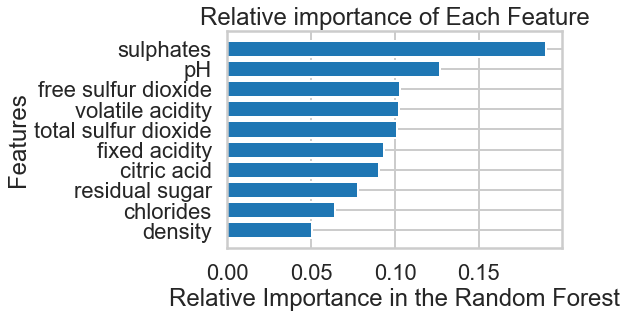

In [21]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 10} 0.4444084052564798 {'mean_fit_time': array([0.02573309, 0.02812433, 0.02812462, 0.02712727, 0.03211331,
       0.03171439, 0.03730021, 0.03570409, 0.04129028, 0.04108863,
       0.04169087, 0.04567752, 0.05245953, 0.04986491, 0.05166159,
       0.0530582 , 0.05744596, 0.06243291, 0.06083636, 0.06662207,
       0.06362882, 0.0670198 , 0.06582384, 0.07041335, 0.07220597,
       0.07360353, 0.07659502, 0.07878785, 0.08038435, 0.08377523,
       0.08437414, 0.08656802, 0.08756576, 0.09075685, 0.09135594,
       0.09773874, 0.0985364 , 0.0995337 , 0.10292439, 0.1037219 ,
       0.10571723, 0.10711346, 0.10731282, 0.11070318, 0.11189971,
       0.11748576, 0.10252576, 0.11468472, 0.10611544, 0.10053701]), 'std_fit_time': array([0.00501981, 0.00659805, 0.0031788 , 0.00039911, 0.00353449,
       0.00039861, 0.00645175, 0.00116302, 0.00272153, 0.00247231,
       0.00074683, 0.00212975, 0.01122341, 0.00209208, 0.0041073 ,
       0.00146584, 0.00343132, 0.0038

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask


c:\users\shravya muthyapu\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 59} 0.4544168617285958 {'mean_fit_time': array([0.02872334, 0.03351073, 0.02333751, 0.02633367, 0.02134233,
       0.02792854, 0.02832437, 0.02333808, 0.02513256, 0.0277256 ,
       0.02632966, 0.02732639, 0.02632957, 0.02772517, 0.02932124,
       0.02872276, 0.02892246, 0.02991991, 0.0319149 , 0.02972045,
       0.03610344, 0.03051839, 0.03191462, 0.03191495, 0.03331056,
       0.03390961, 0.03610311, 0.03849683, 0.03410873, 0.03769889,
       0.03211784, 0.0285234 , 0.02991962, 0.03410869, 0.03949432,
       0.04288516, 0.05086317, 0.04388223, 0.05026584, 0.06163478,
       0.05884247, 0.05046282, 0.04049163, 0.05006614, 0.04188771,
       0.04069109, 0.04328222, 0.04288516, 0.04408126, 0.04348373,
       0.04647498, 0.048071  , 0.047473  , 0.0510632 , 0.05046659,
       0.04787159, 0.04986658, 0.05185957, 0.05126281, 0.05345511,
       0.04128957, 0.04148817, 0.04667315, 0.04448171, 0.04647536,
       0.0590415 , 0.08198009, 0.06263146, 0.07101

In [24]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
# your code here
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]


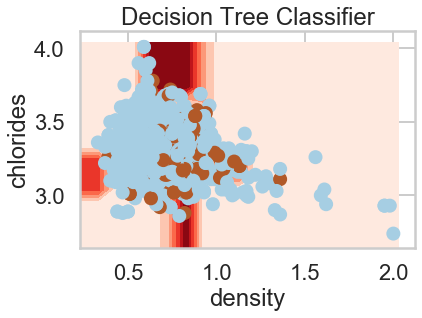

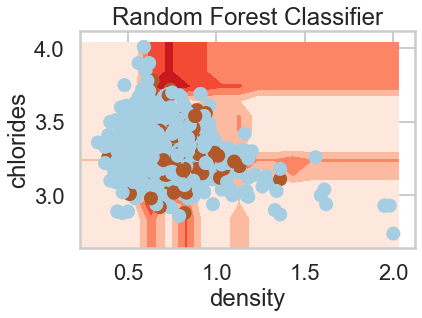

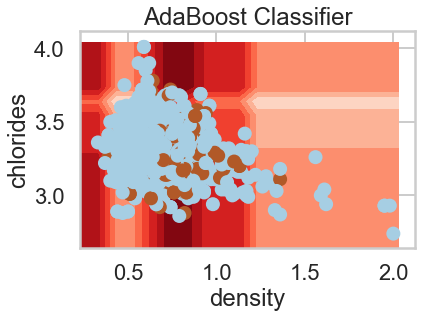

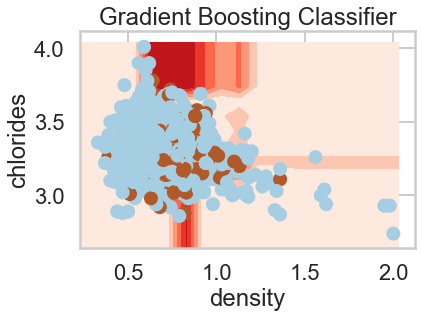

In [25]:
X_imp = df[df.columns[imp_cols]].values
Y = df.target.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(4):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)